In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw

In [0]:
#!dw configure

In [9]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
ls

drive/  sample_data/


In [15]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/dw_matrix'
/content/drive/My Drive/Colab Notebooks/dw_matrix


In [18]:
ls

HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [19]:
ls matrix_one

day3.ipynb


In [0]:
!mkdir data

In [24]:
ls -a

data/  .git/  .gitignore  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [35]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [36]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [37]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
7539,AVpfP8MHilAPnD_xYFuM,NaN,Nike,"Athletic,Clothing, Shoes & Accessories,Men's S...",Black,NaN,2016-04-29T14:26:21Z,2016-04-29T15:11:46Z,NaN,NaN,9.120223e+10,"[{""key"":""Gender"",""value"":[""Mens""]},{""key"":""Mat...",NaN,"http://i.ebayimg.com/00/$(KGrHqJ,!q!FHpQTwwu9B...",NaN,nikeshoesairessential15182003001black1992vinta...,NaN,NaN,"[{""dateSeen"":[""2016-04-27T00:00:00Z""],""name"":""...",Nike Shoes Air Essential 15 182003 001 Black 1...,76.78,76.78,NaN,NaN,New with defects,NaN,USD,2016-04-29T14:26:21Z,2016-04-27T00:00:00Z,NaN,false,NaN,winning bid,NaN,NaN,NaN,NaN,http://www.ebay.com/itm/Nike-Shoes-Air-Essenti...,NaN,NaN,NaN,15,"[{""sourceURLs"":[""http://www.ebay.com/itm/Nike-...",http://www.ebay.com/itm/Nike-Shoes-Air-Essenti...,NaN,NaN,NaN,NaN
1272,AVpe9VjKLJeJML43zNjv,NaN,Leg Avenue,"Men's Halloween Costumes,Adult Halloween Costu...",Multicolor,NaN,2015-10-19T13:56:20Z,2017-01-24T20:49:39Z,"[{""dateSeen"":[""2017-01-24T20:49:39Z""],""sourceU...",18.5 in x 11.81 in x 2.76 in,7.147185e+11,"[{""key"":""Clothing Size Type"",""value"":[""Regular...",NaN,https://i5.walmartimages.com/asr/543094d3-8147...,NaN,"714718499789,legavenue/as8503425025,0714718499...",NaN,AS8503425025,"[{""dateSeen"":[""2017-01-24T20:49:39Z""],""name"":""...",Leg Avenue Assassin's Creed Ezio Adult Hallowe...,124.04,124.04,NaN,NaN,new,NaN,USD,2017-01-24T20:49:39Z,2017-01-24T20:49:39Z,NaN,true,NaN,USD 64.09,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Assassin-s-Creed-Ez...,NaN,NaN,NaN,"XS,Xl","[{""sourceURLs"":[""https://www.walmart.com/ip/As...",https://www.walmart.com/ip/Assassin-s-Creed-Ez...,714718499789,NaN,NaN,NaN
1453,AVpfGp9FLJeJML432dvk,NaN,adidas,"Clothing, Shoes & Accessories,Team Sports,Men,...",BlackSilverYellow,NaN,2015-11-16T11:25:43Z,2016-04-10T23:30:35Z,NaN,NaN,8.864087e+11,"[{""key"":""Sport"",""value"":[""Soccer""]},{""key"":""Co...",NaN,http://i.ebayimg.com/images/g/MeYAAOSwQTVWAd9i...,NaN,adidasadizerof30trxfgsoccercleatsblacksilverye...,NaN,NaN,"[{""dateSeen"":[""2016-04-10T00:00:00Z""],""name"":""...",Adidas Adizero F30 Trx Fg Soccer Cleats (black...,45.00,45.00,NaN,NaN,New without box,NaN,USD,2015-11-16T11:25:43Z,2015-11-14T00:00:00Z,NaN,false,NaN,NaN,NaN,USD 12.65,NaN,NaN,http://www.ebay.com/itm/ADIDAS-Adizero-F30-TRX...,NaN,NaN,NaN,8.5,"[{""sourceURLs"":[""http://www.ebay.com/itm/ADIDA...",http://www.ebay.com/itm/ADIDAS-Adizero-F30-TRX...,886408660028,NaN,NaN,NaN
5649,AVpfVm2jLJeJML437Xg7,NaN,Emporio Armani,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",Brown,NaN,2017-01-27T01:30:36Z,2017-01-27T01:30:36Z,"[{""dateSeen"":[""2017-01-27T01:30:36Z""],""sourceU...",NaN,7.379933e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/acdb2d68-7e05...,NaN,"emporioarmani/737993314875,737993314875,073799...",NaN,737993314875,"[{""dateSeen"":[""2017-01-27T01:30:36Z""],""name"":""...",Emporio Armani Mens Sneakers Size 5 Us Brown 7...,79.95,79.95,NaN,NaN,new,NaN,USD,2017-01-27T01:30:36Z,2017-01-25T00:00:00Z,NaN,true,Urbanity Boutique - Walmart.com,REDUCED USD 176.05,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Emporio-Armani-Mens...,NaN,NaN,NaN,5,NaN,https://www.walmart.com/ip/Emporio-Armani-Mens...,737993314875,NaN,NaN,NaN
18888,AVpfkOp11cnluZ0-nF3y,NaN,SKECHERS,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",Wheat,NaN,2017-01-27T01:20:33Z,2017-01-27T01:20:33Z,"[{""dateSeen"":[""2017-01-27T01:20:33Z""],""sourceU...",NaN,8.882228e+11,"[{""key"":""Material"",""va

In [38]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [39]:
df['prices_currency'].unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [40]:
df['prices_currency'].value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Shoes.com                                                 1
Name: prices_currency, dtype: int64

In [41]:
df['prices_currency'].value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
New with box                                          0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Shoes.com                                             0.000052
Name: prices_currency, dtype: float64

In [45]:
df_usd = df[df['prices_currency'] == 'USD'].copy()
df_usd.shape

(18524, 48)

In [46]:
df_usd['prices_amountmin'].head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

In [48]:
df_usd['prices_amountmin'].astype(np.float).head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: float64

In [0]:
%matplotlib inline
import matplotlib

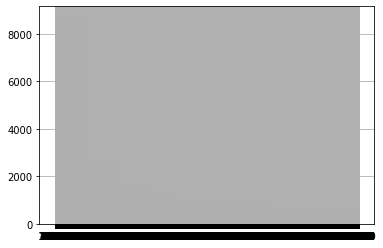

In [53]:
df_usd['prices_amountmin'].hist()

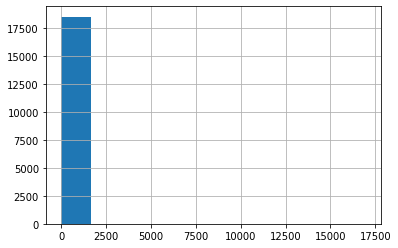

In [56]:
df_usd['prices_amountmin'] = df_usd['prices_amountmin'].astype(np.float)
df_usd['prices_amountmin'].hist();

In [60]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

895.0

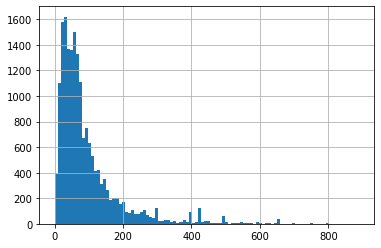

In [68]:
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max]
df_usd_filter['prices_amountmin'].hist(bins=100);

In [69]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
df_usd_filter.to_csv('data/shoes_prices.csv', index=False)

In [74]:
ls -l matrix_one/

total 51
-rw------- 1 root root 51302 Feb 12 12:57 day3.ipynb


In [0]:
!git add matrix_one/da